#  Разведочный анализ соцдема самых популярнух групп посвященных аниме-тематике в ВК

- https://vk.com/animewebm
- https://vk.com/anime
- https://vk.com/a.webm

## Подготовка данных:

Подготовим данные и соберем все в единый датасет

In [239]:
# Загружаем необходимые библиотеки

import datetime                  # Пакет для работы с временными форматами
import pickle                    # Пакет для подгрузки данных специфического для питона формата
import requests                  # Пакет для скачки данных из этих ваших интернетов
import pandas as pd              # Пакет для работы с таблицами
import numpy as np               # Пакет для работы с векторами и матрицами
import matplotlib.pyplot as plt  # Пакет для строительства графиков
import time            # Пакет для работы со временем. Например, помогает ставить заглушки 
                       # time.sleep(секунды), необходимые для того что ВК не банил нащего
                       # сборщика данных из-за слишком частых запросов
        
# Пакет для красивых циклов. При желании его можно отключить. Тогда из всех циклов придётся 
# удалять команду tqdm_notebook.
from tqdm import tqdm_notebook   # подробнее: https://github.com/tqdm/tqdm

Начались разборки с ВК:

In [240]:
# мой номер странички
my_user_id = 402720282
# версия используемого API
version = '5.103' 
# подгружаем токен
with open('токен.txt') as f:
    token = f.read()

In [241]:
url = "https://api.vk.com/method/users.get?user_ids={user_id}&access_token={token}&v={version}"
url = url.format(user_id=my_user_id, token=token, version=version)

In [242]:
response = requests.get(url) 
response

<Response [200]>

In [243]:
name = response.json()
name


{'response': [{'id': 402720282,
   'first_name': 'Саша',
   'last_name': 'Яковлева',
   'can_access_closed': True,
   'is_closed': False}]}

In [244]:
name['response'][0]

{'id': 402720282,
 'first_name': 'Саша',
 'last_name': 'Яковлева',
 'can_access_closed': True,
 'is_closed': False}

In [245]:
def vkDownload(method, parameters, token=token, version=version):
    """
        Возвращает результат запроса по методу
        
        method: string
            метод из документации, который хотим использовать
            
        parameters: string
            параметры используемого метода
            
        token: string
            токен Oauth доступа
        
        version: string
            версия API
    """
    
    # составляем ссылку
    url = 'https://api.vk.com/method/{method}?{parameters}&access_token={token}&v={version}'
    url = url.format(method=method, parameters=parameters, token=token, version=version)
    # запрашиваем ссылку и переводим в json (словарь)
    response = requests.get(url).json()
    
    return response

In [246]:
with open('токен.txt') as f:
    token = f.read()

In [247]:
wall = vkDownload('wall.get','user_ids=402720282')
wall

{'response': {'count': 5,
  'items': [{'inner_type': 'wall_wallpost',
    'copy_history': [{'inner_type': 'wall_wallpost',
      'type': 'post',
      'attachments': [{'type': 'photo',
        'photo': {'album_id': -7,
         'date': 1661408427,
         'id': 457286759,
         'owner_id': -118281792,
         'access_key': 'f588e7909c2eca0930',
         'post_id': 159149,
         'sizes': [{'height': 46,
           'type': 's',
           'width': 75,
           'url': 'https://sun9-39.userapi.com/impg/lROP7JtyRkFst6bLNzwOLDWg-SFLZjNCpxUbeg/B61jqI1MbXw.jpg?size=75x46&quality=95&sign=7bd152c0db66f0d8815198b4d9264708&c_uniq_tag=i2f1uO_fXin5gIXQtC_2O15awnf_bJlkIoPdfQTuZSo&type=album'},
          {'height': 81,
           'type': 'm',
           'width': 130,
           'url': 'https://sun9-39.userapi.com/impg/lROP7JtyRkFst6bLNzwOLDWg-SFLZjNCpxUbeg/B61jqI1MbXw.jpg?size=130x81&quality=95&sign=257751f36a5435ffa79aef36297390fa&c_uniq_tag=s96I8_XSxNfl1vgvZ5ColXg5e_6uoHUykpuGKLGcnCE&type=

In [248]:
# обратимся к первой записи, которая лежит в поле response по ключу items
wall['response']['items'][0]

{'inner_type': 'wall_wallpost',
 'copy_history': [{'inner_type': 'wall_wallpost',
   'type': 'post',
   'attachments': [{'type': 'photo',
     'photo': {'album_id': -7,
      'date': 1661408427,
      'id': 457286759,
      'owner_id': -118281792,
      'access_key': 'f588e7909c2eca0930',
      'post_id': 159149,
      'sizes': [{'height': 46,
        'type': 's',
        'width': 75,
        'url': 'https://sun9-39.userapi.com/impg/lROP7JtyRkFst6bLNzwOLDWg-SFLZjNCpxUbeg/B61jqI1MbXw.jpg?size=75x46&quality=95&sign=7bd152c0db66f0d8815198b4d9264708&c_uniq_tag=i2f1uO_fXin5gIXQtC_2O15awnf_bJlkIoPdfQTuZSo&type=album'},
       {'height': 81,
        'type': 'm',
        'width': 130,
        'url': 'https://sun9-39.userapi.com/impg/lROP7JtyRkFst6bLNzwOLDWg-SFLZjNCpxUbeg/B61jqI1MbXw.jpg?size=130x81&quality=95&sign=257751f36a5435ffa79aef36297390fa&c_uniq_tag=s96I8_XSxNfl1vgvZ5ColXg5e_6uoHUykpuGKLGcnCE&type=album'},
       {'height': 374,
        'type': 'x',
        'width': 604,
        'url':

In [249]:
def vk_download1(method, parameters):
    url = 'https://api.vk.com/method/' + method + \
'?' + parameters + '&v=' + version + '&access_token=' + token
    
    response = requests.get(url)
    return response.json()['response']

In [250]:
group_id = '-102087446'

wall = vk_download1('wall.get','owner_id=' + group_id)
wall.keys()

dict_keys(['count', 'items'])

In [251]:
wall['count']

32055

In [252]:
len(wall['items'])

20

In [253]:
from tqdm import tqdm_notebook
import time

n = vk_download1('wall.get','owner_id=' + group_id)['count']
n

32055

In [254]:
infa = { 
    'id': [ ],
    'text': [ ],
    'likes': [ ],
}

for i in tqdm_notebook(range(0, 1000, 100)):
    time.sleep(0.4)
    wall = vk_download1('wall.get','owner_id=' + group_id + \
                       '&count=100&offset=' + str(i)
                      )['items']
    
    infa['likes'].extend([item['likes']['count'] for item in wall])
    infa['id'].extend([item['id'] for item in wall])
    infa['text'].extend([item['text'] for item in wall])
    
df = pd.DataFrame(infa)
df.head()

C:\Users\Александра\AppData\Local\Temp\ipykernel_15220\2258335266.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, 1000, 100)):


  0%|          | 0/10 [00:00<?, ?it/s]

,id,text,likes
0,1100208,,110
1,1100198,,210
2,1100196,,130
3,1100190,,80
4,1100169,,10


In [255]:
wall = vk_download1('wall.get','owner_id=' + group_id + \
                       '&count=100&offset=' + str(i)
                      )
wall

{'count': 32055,
 'items': [{'inner_type': 'wall_wallpost',
   'comments': {'can_post': 1, 'count': 10},
   'marked_as_ads': 0,
   'hash': 'CiW9BBh5OcNEjtuCAfuwc7nXtxMp',
   'type': 'post',
   'donut_miniapp_url': 'https://vk.com/app51528700#/?owner_id=-102087446&no_badges=1&post_id=1079623',
   'attachments': [{'type': 'video',
     'video': {'response_type': 'full',
      'access_key': '884f2b3d0337df76c5',
      'can_comment': 1,
      'can_like': 1,
      'can_repost': 1,
      'can_subscribe': 1,
      'can_add_to_faves': 1,
      'can_add': 1,
      'comments': 12,
      'date': 1690206732,
      'description': '🔥БОЛЬШЕ ГОДНОТЫ ЗДЕСЬ🔥 \n\n👉 https://vk.com/animewebm 👈 \n👉 https://vk.com/animewebm 👈 \n👉 https://vk.com/animewebm 👈',
      'duration': 17,
      'image': [{'url': 'https://i.mycdn.me/getVideoPreview?id=4876196252251&idx=9&type=39&tkn=fOZXKyN6GUYDh09fSr1cq4nPcS4&fn=vid_s',
        'width': 130,
        'height': 96,
        'with_padding': 1},
       {'url': 'https://i.

## Сбор данных сообществ:

Разборки кончились, пора работать с нужными нам сообществами

In [256]:
# Основные параметры, которые мы хотим получить
fields = 'bdate, city, home_town, sex'
group_id = '-102087446'

In [257]:
anime_groups = {
     'Anime WebM' : 'animewebm',
     'Аниме' : 'anime',
    'a.WebM' : 'a.webm'}

In [258]:
group_id = 'animewebm'
count = vkDownload('groups.getMembers','group_id=' + group_id)['response']['count']


In [259]:
count

442600

In [260]:
def getGroupMembers(group_id):
    """
        Возвращает список всех пользователей данной группы
        Итерации идут батчами по 1000 пользователей
        
        group_id: string
            идентификатор группы (ссылка)
    """
    
    # Узнаём число запросов, которое надо сделать 
    count = vkDownload('groups.getMembers','group_id=' + group_id)['response']['count']
    
    # выясняем, сколько запросов нам понадобиться
    n = int(np.ceil(count/1000))  
    
    # вектор, где мы будем хранить id пользователей
    members = []     
    
    for i in tqdm_notebook(range(n)): 
        # при помощи метода groups.getMembers получаем пользователей группы
        current_members = vkDownload('groups.getMembers','group_id='+group_id+'&offset='+str(1000*i))
        members.extend(current_members['response']['items'])
        # перед следующим запросом немножко подождем
        time.sleep(0.4)
        
    return members

In [230]:
anime_members = getGroupMembers(anime_groups['Anime WebM'])

C:\Users\Александра\AppData\Local\Temp\ipykernel_15220\1341403498.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/443 [00:00<?, ?it/s]

In [231]:
len(anime_members)

442532

In [261]:
# Цикл для выгрузки всех участников групп
# Выкачивzаем членов каждой группы 

anime_people = {}
for anime, group_id in anime_groups.items():
    anime_people[anime] = getGroupMembers(group_id)

# Сохраняем словарик с id пользователей
with open('anime_people', 'wb') as f:
    pickle.dump(anime_people, f)

C:\Users\Александра\AppData\Local\Temp\ipykernel_15220\1341403498.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/443 [00:00<?, ?it/s]

  0%|          | 0/558 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

In [262]:
for anime, people in anime_people.items():
    print("Аниме сообщество: {}, число подписчиков: {}".format(anime, len(people)))

Аниме сообщество: Anime WebM, число подписчиков: 442598
Аниме сообщество: Аниме, число подписчиков: 557067
Аниме сообщество: a.WebM, число подписчиков: 160206


In [263]:
# объединяем всех подписчиков в один лист
unique_anime_people = sum(anime_people.values(), [])
# берем только уникальных людей
unique_anime_people = list(set(unique_anime_people))

len(unique_anime_people)

1035675

### Создание датасета:

In [270]:
def getUserInformation():
    """
        Возвращает словарь с выгруженными социально-демографическими данными 
        по всем пользователям, подписанным на группы
    """
    
    # инициализируем пустой словарь, где будут хранитсья пользователи с их соцдемом
    anime_people_information = {}
    # проходимся по всем кандидатам
    for anime, people in anime_people.items():
        # текущий список пользователей с соц-демом
        current_info = []
        #посчитаем число пользователей для группы
        count = len(people)
        # Выяснили число запросов
        n = int(np.ceil(count/500))  
        
        for i in tqdm_notebook(range(n)):
            # берем текущий срез подписчиков
            ids = people[i*500:(i+1)*500]
            ids = ','.join([str(user) for user in ids])
            # выгружаем их и берем данные
            info = vkDownload('users.get','user_ids={}&fields={}'.format(ids, fields))
            info = info['response']
            # записываем в текущий лист
            current_info.extend(info)
            # ждем перед следующим запросом
            time.sleep(0.4)
        
        # записываем в финальный словарь
        anime_people_information[anime] = current_info
    
    return anime_people_information

In [271]:
anime_people_information = getUserInformation()

C:\Users\Александра\AppData\Local\Temp\ipykernel_15220\1066770976.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/886 [00:00<?, ?it/s]

  0%|          | 0/1115 [00:00<?, ?it/s]

  0%|          | 0/321 [00:00<?, ?it/s]

In [272]:
#спрячем данные в дамп pickle
with open('anime_people_information', 'wb') as f:
     pickle.dump(anime_people_information, f)

In [275]:
# инициализируем датафрейм
anime_people_information_df = pd.DataFrame()

# идем по всем кандидатам и соц-дему их подписчиков
for anime, people in anime_people_information.items():
    # преобразуем в словарь в датафрейм
    df = pd.DataFrame(people)
    # добавляем столбец с городом
    df['city'] = df.city.apply(lambda x: x['title'] if x is not np.nan else np.nan)
    # добавляем столбец с городом
    df['anime'] = anime
    # добавляем преобразованный датафрейм к финальному
    anime_people_information_df = anime_people_information_df.append(df, ignore_index=True)

C:\Users\Александра\AppData\Local\Temp\ipykernel_15220\2219387233.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anime_people_information_df = anime_people_information_df.append(df, ignore_index=True)
C:\Users\Александра\AppData\Local\Temp\ipykernel_15220\2219387233.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anime_people_information_df = anime_people_information_df.append(df, ignore_index=True)
C:\Users\Александра\AppData\Local\Temp\ipykernel_15220\2219387233.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anime_people_information_df = anime_people_information_df.append(df, ignore_index=True)


Кажется все готово, пора создавать датасет! 

In [276]:
anime_people_information_df

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,home_town,deactivated,anime
0,2136,23.10,Рязань,2,Ярослав,Техник,True,False,NaN,NaN,Anime WebM
1,2395,11.8,Санкт-Петербург,2,Александр,Москаленко,True,False,Санкт-Петурбург,NaN,Anime WebM
2,2513,1.8,NaN,1,Маргарита,Автухова,True,False,NaN,banned,Anime WebM
3,3388,NaN,Екатеринбург,2,Владислав,Шаклеин,True,False,NaN,NaN,Anime WebM
4,4236,NaN,Донецк,2,German,Reinecke,True,False,Донецкая Народная Республика,NaN,Anime WebM
...,...,...,...,...,...,...,...,...,...,...,...
1159866,855312737,1.2.2002,NaN,2,Pizal,Lizdu,True,False,,NaN,a.WebM
1159867,855315840,7.4.2002,Даугавпилс,1,Arīna,Lāce,False,True,NaN,NaN,a.WebM
1159868,855343635,3.9.2001,NaN,1,Лазулум,Змейка-Танцовщица,True,False,,NaN,a.WebM
1159869,855357486,29.5.2005,Санкт-Петербург,1,Рината,Сенна,True,False,СПБ,NaN,a.WebM


Ураа, больше миллиона значений!

In [329]:
anime_people_information_df.shape

(1159871, 11)

Оформим графу пола:

In [278]:
anime_people_information_df['sex'] = np.where(anime_people_information_df['sex']==1, 'Female', 'Male')

Оформим дату рождения

In [279]:
anime_people_information_df['bdate'].str.split('.', expand=True)

,0,1,2
0,23,10,None
1,11,8,None
2,1,8,None
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1159866,1,2,2002
1159867,7,4,2002
1159868,3,9,2001
1159869,29,5,2005


In [280]:
df_bdate = anime_people_information_df

In [281]:
df_ = df_bdate['bdate'].str.split('.', expand=True)

In [282]:
df_bdate = pd.concat([df_bdate, df_], axis=1)

In [283]:
df_bdate = df_bdate.rename(columns={0: 'day_bdate', 1: 'month_bdate', 2: 'year_bdate'})

Получилось!

In [284]:
df_bdate

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,home_town,deactivated,anime,day_bdate,month_bdate,year_bdate
0,2136,23.10,Рязань,Male,Ярослав,Техник,True,False,NaN,NaN,Anime WebM,23,10,None
1,2395,11.8,Санкт-Петербург,Male,Александр,Москаленко,True,False,Санкт-Петурбург,NaN,Anime WebM,11,8,None
2,2513,1.8,NaN,Female,Маргарита,Автухова,True,False,NaN,banned,Anime WebM,1,8,None
3,3388,NaN,Екатеринбург,Male,Владислав,Шаклеин,True,False,NaN,NaN,Anime WebM,NaN,NaN,NaN
4,4236,NaN,Донецк,Male,German,Reinecke,True,False,Донецкая Народная Республика,NaN,Anime WebM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159866,855312737,1.2.2002,NaN,Male,Pizal,Lizdu,True,False,,NaN,a.WebM,1,2,2002
1159867,855315840,7.4.2002,Даугавпилс,Female,Arīna,Lāce,False,True,NaN,NaN,a.WebM,7,4,2002
1159868,855343635,3.9.2001,NaN,Female,Лазулум,Змейка-Танцовщица,True,False,,NaN,a.WebM,3,9,2001
1159869,855357486,29.5.2005,Санкт-Петербург,Female,Рината,Сенна,True,False,СПБ,NaN,a.WebM,29,5,2005


Фильтруем аудиторию по признаку открытости страницы, чтобы можно было собрать больше информации

In [285]:
df_bdate = df_bdate.loc[((df_bdate['can_access_closed'] == True))] 

In [286]:
#удаляем столбцы с днем и месяцем рождения, нам нужен только год
df_bdate = df_bdate.drop(['day_bdate', 'month_bdate'], axis=1)

In [287]:
df_bdate = df_bdate.dropna(subset=['year_bdate'])

In [288]:
df_bdate

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,home_town,deactivated,anime,year_bdate
5,4478,11.7.2000,Бутово,Female,Милена,Соснина,True,False,NaN,banned,Anime WebM,2000
6,5251,6.9.1987,NaN,Male,Кирилл,Мищенко,True,False,NaN,NaN,Anime WebM,1987
8,6892,11.7.2003,Москва,Female,Аня,Лазарева,True,False,NaN,banned,Anime WebM,2003
17,22283,29.2.1988,NaN,Male,Сергей,Мобгу,True,False,Киев,NaN,Anime WebM,1988
18,22643,9.12.1987,Москва,Female,Диана,Александрова,True,False,NaN,banned,Anime WebM,1987
...,...,...,...,...,...,...,...,...,...,...,...,...
1159864,855196788,26.8.2001,NaN,Male,Кирилл,Аристархов,True,False,,NaN,a.WebM,2001
1159865,855287009,17.1.2005,NaN,Male,'sir,'crocodile,True,False,,NaN,a.WebM,2005
1159866,855312737,1.2.2002,NaN,Male,Pizal,Lizdu,True,False,,NaN,a.WebM,2002
1159868,855343635,3.9.2001,NaN,Female,Лазулум,Змейка-Танцовщица,True,False,,NaN,a.WebM,2001


Получили почти полмиллиона пользователей ВКонтакте, чтож, пора переходить к самому анализу, давайте постараемся выяснить возраст подписчиков сообществ, посмотрим где большинство из них живет, узнаем распределение по половому признаку, поизучаем их имена 

In [290]:
df_bdate['year_bdate'] = pd.to_numeric(df_bdate['year_bdate'], errors= 'coerce')

In [291]:
df_bdate.dtypes

id                    int64
bdate                object
city                 object
sex                  object
first_name           object
last_name            object
can_access_closed      bool
is_closed              bool
home_town            object
deactivated          object
anime                object
year_bdate            int64
dtype: object

In [292]:
df_bdate['age'] = 2024 - df_bdate['year_bdate']

In [293]:
df_bdate

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,home_town,deactivated,anime,year_bdate,age
5,4478,11.7.2000,Бутово,Female,Милена,Соснина,True,False,NaN,banned,Anime WebM,2000,24
6,5251,6.9.1987,NaN,Male,Кирилл,Мищенко,True,False,NaN,NaN,Anime WebM,1987,37
8,6892,11.7.2003,Москва,Female,Аня,Лазарева,True,False,NaN,banned,Anime WebM,2003,21
17,22283,29.2.1988,NaN,Male,Сергей,Мобгу,True,False,Киев,NaN,Anime WebM,1988,36
18,22643,9.12.1987,Москва,Female,Диана,Александрова,True,False,NaN,banned,Anime WebM,1987,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159864,855196788,26.8.2001,NaN,Male,Кирилл,Аристархов,True,False,,NaN,a.WebM,2001,23
1159865,855287009,17.1.2005,NaN,Male,'sir,'crocodile,True,False,,NaN,a.WebM,2005,19
1159866,855312737,1.2.2002,NaN,Male,Pizal,Lizdu,True,False,,NaN,a.WebM,2002,22
1159868,855343635,3.9.2001,NaN,Female,Лазулум,Змейка-Танцовщица,True,False,,NaN,a.WebM,2001,23


<AxesSubplot:>

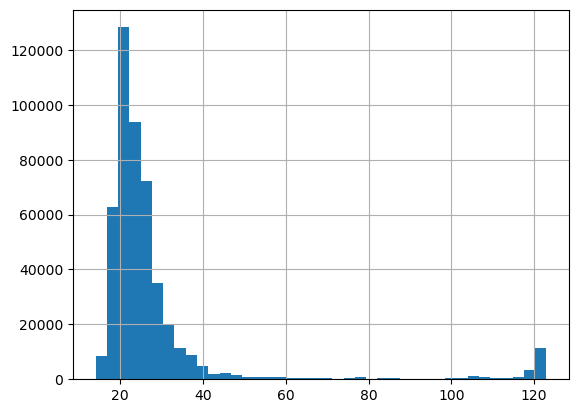

In [332]:
df_bdate['age'].hist(bins = 40)

Собрали **возраст** подписчиков, как видно из гистограммы, большинству людей немного больше 20, есть заметный скачок в районе 120 лет, видимо там те самые шутники, которые ставят самый высокий год рождения из всех возможных

In [298]:
df_bdate.groupby(
    by=['anime'])[['age']].mean().sort_values(by='age', ascending=False)

,age
anime,
Anime WebM,29.306018
a.WebM,28.827181
Аниме,28.349079


Можно заметить, что у целевой аудитории пабликов в среднем один возраст

In [299]:
df_bdate.groupby(
    by=['sex'])[['age']].mean().sort_values(by='age', ascending=False)

,age
sex,
Male,29.061747
Female,28.082210


Видимо, аниме интересуются мужчины постарше, раз сдвиг в среднем возрасте почти год

Хочу посмотреть, сколько людей среди всех подписчиков этих пабликов разделяют со мной **один день рождения**

In [361]:
df_bdte_me = df_bdate[df_bdate['bdate'] == '29.6.2005']
df_bdte_me

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,home_town,deactivated,anime,year_bdate,age,sasha,ivanov,nastya,tyan
117997,239704748,29.6.2005,Гомель,Female,Карина,Кукса,True,False,,NaN,Anime WebM,2005,19,0,0,0,0
152975,282215639,29.6.2005,NaN,Male,Владислав,Чупин,True,False,NaN,NaN,Anime WebM,2005,19,0,0,0,0
161972,295089423,29.6.2005,Керчь,Male,Виталик,Волковский,True,False,NaN,NaN,Anime WebM,2005,19,0,0,0,0
185211,325157974,29.6.2005,Москва,Male,Олег,Медведев,True,False,Moscow,NaN,Anime WebM,2005,19,0,0,0,0
197270,341201255,29.6.2005,NaN,Male,Александр,Домоседов,True,False,NaN,NaN,Anime WebM,2005,19,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119968,550732011,29.6.2005,NaN,Male,Тимофей,Бакнин,True,False,,NaN,a.WebM,2005,19,0,0,0,0
1121029,553751888,29.6.2005,NaN,Male,Danil,Tytov,True,False,,NaN,a.WebM,2005,19,0,0,0,0
1141713,641090397,29.6.2005,Чудово,Male,Андрей,Химушкин,True,False,,NaN,a.WebM,2005,19,0,0,0,0
1152314,744748278,29.6.2005,Санкт-Петербург,Male,Tony,Bayonetta,True,False,,NaN,a.WebM,2005,19,0,0,0,0


Здорово, целых  87 человек, надо будет не  забыть их поздравить в июне

Теперь посмотрим на **города**, из которых постят подписчики пабликов

In [301]:
a = df_bdate.groupby(
    by=['city'])[['id']].count().sort_values(by='id', ascending=False)
a

,id
city,
Москва,33615
Санкт-Петербург,17053
Tokyo,7908
Екатеринбург,4118
Краснодар,4098
...,...
Великоселки,1
Великодолинское,1
Великодворский,1


Что не удивительно, лидируют **Москва и Санкт-Петербург**, из интересного видно, что на третьем месте **Токио**, видимо аниме-любители сильно прониклись культурой Японии, раз указывают Токио

Теперь посмотрим на **имена** аудитории пабликов, для удобства разделим наш датасет на мужчин и женщин

In [316]:
df_bdate_men = df_bdate[df_bdate['sex'] == 'Male']

In [318]:
b = df_bdate_men.groupby(
    by=['first_name'])[['id']].count().sort_values(by='id', ascending=False)
b

,id
first_name,
Александр,11847
Никита,9524
Андрей,8413
Максим,8133
Дмитрий,7998
...,...
Shat,1
Shasi,1
Shashank,1


In [326]:
d = df_bdate_men.groupby(
    by=['last_name'])[['id']].count().sort_values(by='id', ascending=False)
d

,id
last_name,
,4846
Иванов,2084
Смирнов,1002
Волков,996
Кузнецов,969
...,...
Зайцевский,1
Karnauh,1
Karnaukhov,1


Самым популярным именем оказался **Александр**, а фамилией - **Иванов**, давайте посмотрим, есть ли среди всех подписчиков Александры Ивановы

In [342]:
def Sasha (x):
    if x == "Александр":
        return 1
    else:
        return 0
df_bdate['sasha'] = df_bdate['first_name'].apply(Sasha)

In [343]:
def Ivanov (x):
    if x == "Иванов":
        return 1
    else:
        return 0
df_bdate['ivanov'] = df_bdate['last_name'].apply(Ivanov)

In [346]:
df_bdate_s = df_bdate[df_bdate['sasha']==1]

In [349]:
df_bdate_si = df_bdate_s[df_bdate_s['ivanov']==1]
df_bdate_si

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,home_town,deactivated,anime,year_bdate,age,sasha,ivanov
3000,19038946,12.10.1994,Самара,Male,Александр,Иванов,True,False,NaN,NaN,Anime WebM,1994,30,1,1
8527,49119726,18.3.1994,Санкт-Петербург,Male,Александр,Иванов,True,False,NaN,NaN,Anime WebM,1994,30,1,1
13288,67684833,4.4.1999,Каменск-Уральский,Male,Александр,Иванов,True,False,NaN,NaN,Anime WebM,1999,25,1,1
15125,74805115,9.9.1999,NaN,Male,Александр,Иванов,True,False,,NaN,Anime WebM,1999,25,1,1
30867,133638022,12.10.1997,NaN,Male,Александр,Иванов,True,False,NaN,NaN,Anime WebM,1997,27,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083249,420568318,3.4.2003,Ейск,Male,Александр,Иванов,True,False,NaN,NaN,a.WebM,2003,21,1,1
1084145,424486312,31.8.2002,Новосибирск,Male,Александр,Иванов,True,False,NaN,NaN,a.WebM,2002,22,1,1
1105188,503958340,19.4.2003,Серов,Male,Александр,Иванов,True,False,Серов,NaN,a.WebM,2003,21,1,1
1124147,562538857,12.9.2005,NaN,Male,Александр,Иванов,True,False,NaN,NaN,a.WebM,2005,19,1,1


Ну вот и выяснилось, что у нас целых **111 Александров Ивановых**, теперь посмотрим на женщин


In [319]:
df_bdate_women = df_bdate[df_bdate['sex'] == 'Female']

In [322]:
c = df_bdate_women.groupby(
    by=['first_name'])[['id']].count().sort_values(by='id', ascending=False)
c

,id
first_name,
Анастасия,5088
DELETED,3476
Мария,2856
Алина,2747
Анна,2635
...,...
Tian,1
Tiana,1
Tick,1


In [327]:
e = df_bdate_women.groupby(
    by=['last_name'])[['id']].count().sort_values(by='id', ascending=False)
e

,id
last_name,
,3488
Тян,1436
Иванова,887
Волкова,646
Ким,644
...,...
Гривцова,1
Григиола,1
Григоревская,1


Аналогичным путем мы выяснили, что самое популярное имя среди подписчиц этих сообществ - **Анастасия**, а фамилия - **Тян**, видимо эти  девушки  тоже большие поклонницы японской аниме-культуры, посмотрим сколько Анастасий Тян у нас есть

In [350]:
def Nastya (x):
    if x == "Анастасия":
        return 1
    else:
        return 0
df_bdate['nastya'] = df_bdate['first_name'].apply(Nastya)

In [351]:
def Tyan (x):
    if x == "Тян":
        return 1
    else:
        return 0
df_bdate['tyan'] = df_bdate['last_name'].apply(Tyan)

In [353]:
df_bdate_n = df_bdate[df_bdate['nastya']==1]

In [355]:
df_bdate_nt = df_bdate_n[df_bdate_n['tyan']==1]
df_bdate_nt

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,home_town,deactivated,anime,year_bdate,age,sasha,ivanov,nastya,tyan
195910,339325317,7.7.2000,Москва,Female,Анастасия,Тян,True,False,Москва,NaN,Anime WebM,2000,24,0,0,1,1
584706,255611385,10.7.2000,Советск,Female,Анастасия,Тян,True,False,,NaN,Аниме,2000,24,0,0,1,1
611270,280557734,12.1.1998,NaN,Female,Анастасия,Тян,True,False,Россия,NaN,Аниме,1998,26,0,0,1,1
635720,303078064,8.3.2002,Красноярск,Female,Анастасия,Тян,True,False,Красноярск,NaN,Аниме,2002,22,0,0,1,1
650438,315942252,6.5.1994,NaN,Female,Анастасия,Тян,True,False,NaN,NaN,Аниме,1994,30,0,0,1,1
665019,328445171,13.7.2000,Сургут,Female,Анастасия,Тян,True,False,СУРГУТ,NaN,Аниме,2000,24,0,0,1,1
675528,338078709,9.1.2001,Тула,Female,Анастасия,Тян,True,False,,NaN,Аниме,2001,23,0,0,1,1
678730,341037890,30.12.1999,Братск,Female,Анастасия,Тян,True,False,,NaN,Аниме,1999,25,0,0,1,1
697558,358531490,8.5.1926,Tokyo,Female,Анастасия,Тян,True,False,,NaN,Аниме,1926,98,0,0,1,1
699901,360820891,26.4.2001,Омск,Female,Анастасия,Тян,True,False,Япония,NaN,Аниме,2001,23,0,0,1,1


In [357]:
df_bdate_nt.shape

(27, 17)

Чтож, **Анастасий Тян** у нас гораздо меньше, всего **27**